In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
from google.colab import drive
from collections import Counter
import seaborn as sns

In [4]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/DSL/Assingment1

Mounted at /content/drive
/content/drive/My Drive/DSL/Assingment1


In [62]:
Online_Retail = pd.read_excel('Online Retail.xlsx')

In [63]:
Online_Retail.shape

(541909, 8)

In [64]:
Online_Retail.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


Finding Duplicates

In [19]:
duplicate_rows = Online_Retail[Online_Retail.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 5268


In [65]:

# Count duplicate rows
duplicate_counts = Online_Retail.duplicated(keep=False).sum()
print("Total number of duplicate rows (including original rows):", duplicate_counts)

# Find duplicate rows and their counts
duplicate_rows = Online_Retail[Online_Retail.duplicated(keep=False)]
duplicate_row_counts = Online_Retail[Online_Retail.duplicated(keep=False)].groupby(Online_Retail.columns.tolist()).size().reset_index().rename(columns={0:'count'})
print("\nDuplicate Rows with Counts:")
duplicate_row_counts

Total number of duplicate rows (including original rows): 10147

Duplicate Rows with Counts:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
0,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2
1,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2
2,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2
3,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2
4,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
4832,C572226,85066,CREAM SWEETHEART MINI CHEST,-1,2011-10-21 13:58:00,12.75,15321.0,United Kingdom,2
4833,C574095,22326,ROUND SNACK BOXES SET OF4 WOODLAND,-1,2011-11-03 09:54:00,2.95,12674.0,France,2
4834,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom,2
4835,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom,2


Dropping the Duplicate Rows

In [66]:
# Drop duplicate rows
Online_Retail = Online_Retail.drop_duplicates()
print("Number of rows after removing duplicates:", len(Online_Retail))

Number of rows after removing duplicates: 536641


In [67]:
unique_invoices = Online_Retail['InvoiceNo'].nunique()
print("Unique InvoiceNo count:", unique_invoices)


Unique InvoiceNo count: 25900


In [68]:
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [69]:
Online_Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


Each InvoiceNo will be mapped to a particular CustomerID so trying to impute based on it

In [70]:
# Identify missing CustomerID
missing_count = Online_Retail['CustomerID'].isnull().sum()
print(f"Missing CustomerID before imputation: {missing_count}")

# Step 1: Group by InvoiceNo and find the most common CustomerID
customer_id_map = Online_Retail.groupby('InvoiceNo')['CustomerID'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 2: Fill missing CustomerID based on InvoiceNo mapping
Online_Retail['CustomerID'] = Online_Retail.apply(lambda row: customer_id_map[row['InvoiceNo']] if pd.isnull(row['CustomerID']) else row['CustomerID'], axis=1)

# Identify missing CustomerID after imputation
missing_count_after = Online_Retail['CustomerID'].isnull().sum()
print(f"Missing CustomerID after imputation: {missing_count_after}")


Missing CustomerID before imputation: 135037
Missing CustomerID after imputation: 135037


Removing Cancellation Orders from the dataset

In [71]:
# Filter InvoiceNo starting with 'C'
cancellation = Online_Retail[Online_Retail['InvoiceNo'].astype(str).str.startswith('C')]

# Display or further process the filtered data
cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [72]:
cancellation.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,379
Country,0


In [73]:

# Drop rows where 'InvoiceNo' starts with 'C'
Online_Retail = Online_Retail[~Online_Retail['InvoiceNo'].astype(str).str.startswith('C')]


Online_Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134658
Country,0


In [74]:
Online_Retail.shape

(527390, 8)

Imputing Description value based on StockCode

In [75]:

# Identify missing Description rows before imputation
missing_desc_rows = Online_Retail[Online_Retail['Description'].isnull()].copy()

# Fill missing Description values based on the most common Description for each StockCode
Online_Retail['Description'] = Online_Retail.groupby('StockCode')['Description'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Identify the imputed rows
imputed_rows = Online_Retail.loc[missing_desc_rows.index]

# Print the number of missing values after imputation
print("Missing Description count after imputation:", Online_Retail['Description'].isnull().sum())

# Print the imputed rows
print("\nImputed Rows:")
print(imputed_rows)

Missing Description count after imputation: 0

Imputed Rows:
       InvoiceNo StockCode                          Description  Quantity  \
622       536414     22139     RETROSPOT TEA SET CERAMIC 11 PC         56   
1970      536545     21134                              Unknown         1   
1971      536546     22145      CHRISTMAS CRAFT HEART STOCKING          1   
1972      536547     37509           NEW ENGLAND MUG W GIFT BOX         1   
1987      536549    85226A                              Unknown         1   
...          ...       ...                                  ...       ...   
535322    581199     84581      DOG TOY WITH PINK CROCHET SKIRT        -2   
535326    581203     23406           HOME SWEET HOME KEY HOLDER        15   
535332    581209     21620      SET OF 4 ROSE BOTANICAL CANDLES         6   
536981    581234     72817  SET OF 2 CHRISTMAS DECOUPAGE CANDLE        27   
538554    581408     85175                CACTI T-LIGHT CANDLES        20   

              

Dropping rows having ['Description'] == 'Unknown'

In [76]:

# Filter rows where Description is 'Unknown' and CustomerID is null
filtered_df = Online_Retail[(Online_Retail['Description'] == 'Unknown') & (Online_Retail['CustomerID'].isnull())]

# Print the filtered rows
filtered_df



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,Unknown,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,Unknown,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,Unknown,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,Unknown,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,Unknown,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,Unknown,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,Unknown,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,Unknown,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,Unknown,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [77]:
# Filter rows where Description is 'Unknown'
unknown_desc_rows = Online_Retail[Online_Retail['Description'] == 'Unknown']

# Print rows with Description = 'Unknown'
print("\nRows with Description = 'Unknown':")
print(unknown_desc_rows)

# Drop rows where Description is 'Unknown'
Online_Retail = Online_Retail[Online_Retail['Description'] != 'Unknown']

# Print the DataFrame after dropping rows
print("\nDataFrame after dropping rows with Description = 'Unknown':")
Online_Retail.shape


Rows with Description = 'Unknown':
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
1970      536545     21134     Unknown         1 2010-12-01 14:32:00   
1987      536549    85226A     Unknown         1 2010-12-01 14:34:00   
1988      536550     85044     Unknown         1 2010-12-01 14:34:00   
2024      536552     20950     Unknown         1 2010-12-01 14:34:00   
2026      536554     84670     Unknown        23 2010-12-01 14:35:00   
...          ...       ...         ...       ...                 ...   
280754    561498     21610     Unknown       -14 2011-07-27 14:10:00   
281615    561555    37477B     Unknown       -11 2011-07-28 10:21:00   
281616    561557    37477C     Unknown       -31 2011-07-28 10:21:00   
346849    567207    35592T     Unknown         4 2011-09-19 11:01:00   
497301    578360    84971L     Unknown         2 2011-11-24 10:36:00   

        UnitPrice  CustomerID         Country  
1970          0.0         NaN  United Kingdom  
198

(527274, 8)

Removing Rows having ? in description

In [78]:

# Assuming Online_Retail is your DataFrame
rows_with_question_mark = Online_Retail[Online_Retail['Description'].str.contains('\?', na=False)]
num_rows_with_question_mark = len(rows_with_question_mark)
print(f"Number of rows with '?' in 'Description': {num_rows_with_question_mark}")

Number of rows with '?' in 'Description': 82


In [79]:
rows_with_question_mark["Description"].unique()

array(['?', '? sold as sets?', '?sold as sets?', '?lost', 'damages?',
       'sold in set?', 'POSSIBLE DAMAGES OR LOST?', 'wrong code?',
       'damages/dotcom?', 'code mix up? 84930', '?display?', '?missing',
       '??', 'historic computer difference?....se', 'missing?', '???lost',
       'check?', '?? missing', '????missing', '???missing', 'wet?',
       'lost??', '???', '????damages????'], dtype=object)

In [80]:

# Print the number of rows with '?'
num_rows_with_question_mark = len(rows_with_question_mark)
print(f"Number of rows with '?' in 'Description': {num_rows_with_question_mark}")

# Remove those rows from the DataFrame
Online_Retail = Online_Retail[~Online_Retail['Description'].str.contains(r'\?', na=False)]

# Print the new shape of the DataFrame
print(f"New shape of Online_Retail after removal: {Online_Retail.shape}")

Number of rows with '?' in 'Description': 82
New shape of Online_Retail after removal: (527192, 8)


In [81]:
# Group by 'InvoiceDate' and count unique 'InvoiceNo' for each date
invoice_counts = Online_Retail.groupby('InvoiceDate')['InvoiceNo'].nunique()

# Find dates where the count of unique invoice numbers is greater than 1
dates_with_multiple_invoices = invoice_counts[invoice_counts > 1].index

# Count the number of rows for each of those dates
rows_with_different_invoices = 0
for date in dates_with_multiple_invoices:
    rows_with_different_invoices += len(Online_Retail[Online_Retail['InvoiceDate'] == date])

print(f"Number of rows with same InvoiceDate but different InvoiceNo: {rows_with_different_invoices}")

Number of rows with same InvoiceDate but different InvoiceNo: 73418


Not Immputing CustomerID based on InvoiceDate mapping Since there are 73418 records with same InvoiceDate but different InvoiceNo

In [82]:
# Verify the number of missing values after dropping rows
print(Online_Retail.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134460
Country             0
dtype: int64


Removing Rows with Description with lowercase

In [83]:
import pandas as pd
import re

# Function to check if a row meets the criteria
def has_lowercase_excluding_excessive_uppercase(description):
    if pd.isnull(description):
        return False
    description = str(description)  # Convert to string explicitly

    # Check if there's at least one lowercase letter
    has_lower = bool(re.search(r'[a-z]', description))

    # Count uppercase letters
    uppercase_count = sum(1 for char in description if char.isupper())

    # Return True if there is at least one lowercase character and at most 5 uppercase letters
    return has_lower and uppercase_count <= 5

# Ensure 'Description' is of string type
Online_Retail['Description'] = Online_Retail['Description'].astype(str)

# Find rows meeting the criteria
lowercase_rows = Online_Retail[Online_Retail['Description'].apply(has_lowercase_excluding_excessive_uppercase)]

# Print the number of rows to be removed
print(f"Number of rows to be removed: {len(lowercase_rows)}")
print(lowercase_rows.head())

# Remove those rows from the DataFrame
Online_Retail = Online_Retail[~Online_Retail['Description'].apply(has_lowercase_excluding_excessive_uppercase)]

# Print the new shape of the DataFrame
print(f"New shape of Online_Retail after removal: {Online_Retail.shape}")


Number of rows to be removed: 1009
     InvoiceNo     StockCode                    Description  Quantity  \
2239    536569             M                         Manual         1   
2250    536569             M                         Manual         1   
2567    536592         21594  Dr. Jam's Arouzer Stress Ball         1   
4406    536779  BANK CHARGES                   Bank Charges         1   
5684    536865             M                         Manual         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
2239 2010-12-01 15:35:00       1.25     16274.0  United Kingdom  
2250 2010-12-01 15:35:00      18.95     16274.0  United Kingdom  
2567 2010-12-01 17:06:00       4.21         NaN  United Kingdom  
4406 2010-12-02 15:08:00      15.00     15823.0  United Kingdom  
5684 2010-12-03 11:28:00       2.55         NaN  United Kingdom  
New shape of Online_Retail after removal: (526183, 8)


In [84]:
lowercase_rows.Description.unique()

array(['Manual', "Dr. Jam's Arouzer Stress Ball", 'Bank Charges',
       'amazon', 'check', 'damages', "Dad's Cab Electronic Meter",
       '*Boombox Ipod Classic', 'faulty', 'Dotcom sales', 'amazon sales',
       'Dotcomgiftshop Gift Voucher £40.00', 'Found',
       'Dotcomgiftshop Gift Voucher £50.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'mouldy, thrown away.',
       'found', 'counted', 'Given away', 'Dotcom', 'label mix up',
       'samples/damages', 'thrown away', 'incorrectly made-thrown away.',
       'showroom', 'Adjustment', 'Dotcomgiftshop Gift Voucher £10.00',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', 'Thrown away.',
       'damages/display', 'damaged stock', 'broken', 'throw away',
       'wrong barcode (22467)', 'wrongly sold (22719) barcode',
       'wrong barcode', 'barcode problem', "thrown away-can't sell.",
       "

These Description does not contribute to product analysis so they are removed

In [85]:
Online_Retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133830
Country,0


Rows with Negative Quantity and Zero Unit Price

In [47]:

# Filter rows where Quantity is less than 0
negative_quantity_zero_unitprice_rows = Online_Retail[(Online_Retail['Quantity'] < 0) & (Online_Retail['UnitPrice'] == 0)]

# Print the filtered rows
negative_quantity_zero_unitprice_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,CARD DOLLY GIRL,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,PENNY FARTHING BIRTHDAY CARD,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,CREAM SWEETHEART WALL CABINET,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
521333,580359,20775,DAISY NOTEBOOK,-35,2011-12-02 16:11:00,0.0,NaN,United Kingdom
522160,580379,72225C,LAVENDER SCENT CAKE CANDLE,-144,2011-12-02 17:57:00,0.0,NaN,United Kingdom
522162,580381,21758,VINTAGE SHELLS PRINT,-9,2011-12-02 17:58:00,0.0,NaN,United Kingdom
524369,580546,23406,CHECK,-21,2011-12-05 09:27:00,0.0,NaN,United Kingdom


In [86]:
# Print the number of rows to be removed
print(f"Number of rows to be removed: {len(negative_quantity_zero_unitprice_rows)}")

# Remove those rows from the DataFrame
Online_Retail = Online_Retail[~((Online_Retail['Quantity'] < 0) & (Online_Retail['UnitPrice'] == 0))]

# Print the new shape of the DataFrame
print(f"New shape of Online_Retail after removal: {Online_Retail.shape}")

Number of rows to be removed: 767
New shape of Online_Retail after removal: (525416, 8)


Removing Zero Unit Price with Null Customer ID

In [87]:
# Filter rows where Quantity is less than 0
zero_unitprice_customerid_null_rows = Online_Retail[Online_Retail['UnitPrice'] == 0 & (Online_Retail['CustomerID'].isnull())]

zero_unitprice_customerid_null_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2025,536553,37461,FUNKY MONKEY MUG,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
4348,536765,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,19,2010-12-02 14:43:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535332,581209,21620,SET OF 4 ROSE BOTANICAL CANDLES,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom


In [88]:
# Print the number of rows to be removed
print(f"Number of rows to be removed: {len(zero_unitprice_customerid_null_rows)}")

# Remove those rows from the DataFrame
Online_Retail = Online_Retail[~((Online_Retail['UnitPrice'] == 0) & (Online_Retail['CustomerID'].isnull()))]

# Print the new shape of the DataFrame
print(f"New shape of Online_Retail after removal: {Online_Retail.shape}")

Number of rows to be removed: 987
New shape of Online_Retail after removal: (524463, 8)


In [51]:
Online_Retail.shape

(524463, 8)

Checking for CustomerID duplicated

In [52]:
# Check for duplicate CustomerIDs
duplicate_customer_ids = Online_Retail[Online_Retail.duplicated(subset=['CustomerID'], keep=False)]

# Print the number of duplicate CustomerIDs
print(f"Number of duplicate CustomerIDs: {len(duplicate_customer_ids)}")

# Display the first few rows of duplicate CustomerIDs
print(duplicate_customer_ids.head())

Number of duplicate CustomerIDs: 524390
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [53]:
# Group by CustomerID and count unique InvoiceNo values
customer_invoice_counts = Online_Retail.groupby('CustomerID')['InvoiceNo'].nunique()

# Filter CustomerIDs with more than one unique InvoiceNo
customers_with_multiple_invoices = customer_invoice_counts[customer_invoice_counts > 1]

# Print the results
print("Customers with multiple InvoiceNo entries:")
print(customers_with_multiple_invoices)

Customers with multiple InvoiceNo entries:
CustomerID
12347.0     7
12348.0     4
12352.0     7
12356.0     3
12358.0     2
           ..
18272.0     6
18273.0     3
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 2838, dtype: int64


There are CustomersID with Multiple Invoice Number So logicaly we can't impute the CustomersID

In [54]:
# Print the number of rows to be removed
print(f"Online_Retail before removal: {Online_Retail.shape}")

Online_Retail = Online_Retail.dropna(subset=['CustomerID'])

print(f"Online_Retail After removal: {Online_Retail.shape}")

Online_Retail before removal: (524463, 8)
Online_Retail After removal: (392353, 8)


Visulaisation

In [55]:
Online_Retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392353.000000,392353,392353.000000,392353.000000
mean,13.148496,2011-07-10 19:03:22.536797440,2.998207,15287.636335
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.636906,NaN,15.045821,1713.455965


In [56]:

# Display column data types
Online_Retail.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [57]:
# Display the number of unique values and their frequencies for categorical features.
categorical_features = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for col in categorical_features:
    unique_values = Online_Retail[col].unique()
    value_counts = Online_Retail[col].value_counts()
    print(f"Feature: {col}")
    print(f"Number of unique values: {len(unique_values)}")
    print("Value frequencies:")
    print(value_counts)
    print("-" * 20)

Feature: InvoiceNo
Number of unique values: 18457
Value frequencies:
InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
566253      1
551877      1
543842      1
540842      1
562532      1
Name: count, Length: 18457, dtype: int64
--------------------
Feature: StockCode
Number of unique values: 3661
Value frequencies:
StockCode
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
90104        1
84963B       1
90027D       1
90027A       1
23843        1
Name: count, Length: 3661, dtype: int64
--------------------
Feature: Description
Number of unique values: 3873
Value frequencies:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL B

<ipython-input-58-2ada68a160f2>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Online_Retail.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot()


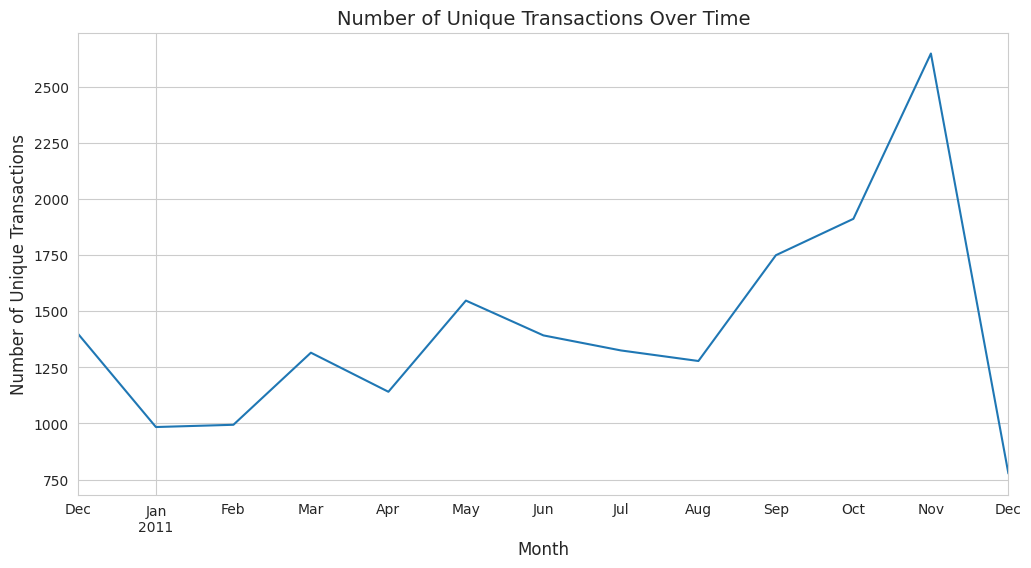

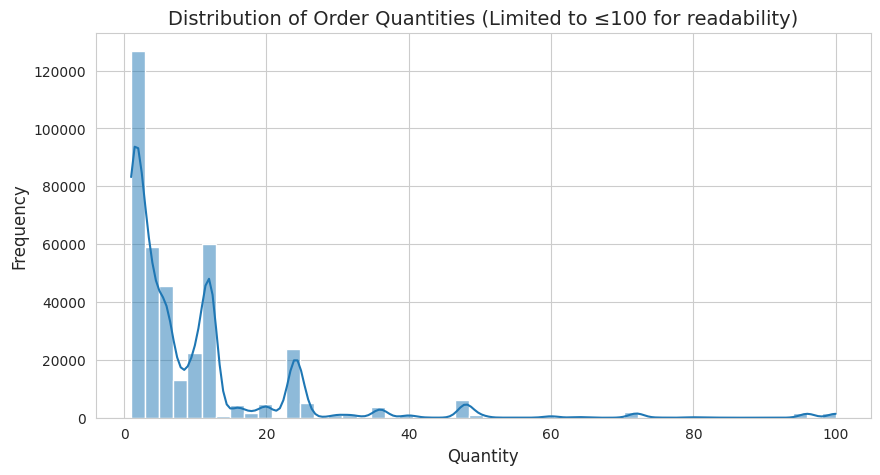

<ipython-input-58-2ada68a160f2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


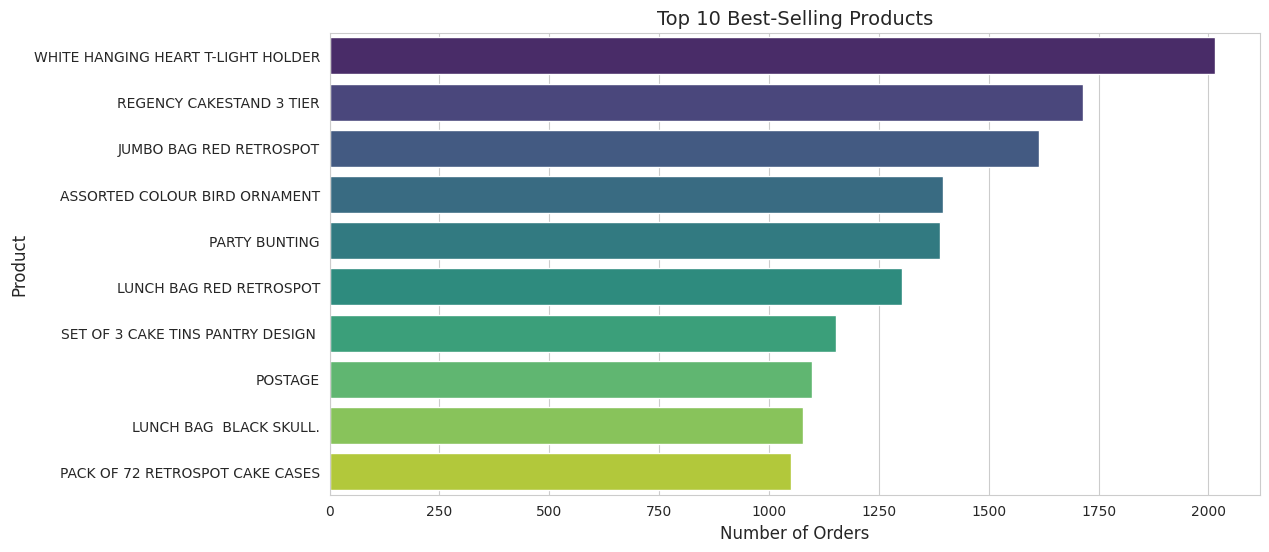

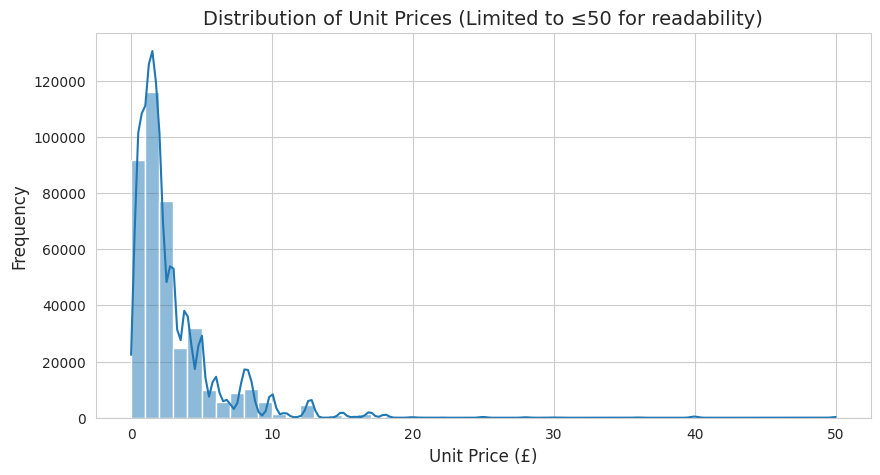

<ipython-input-58-2ada68a160f2>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


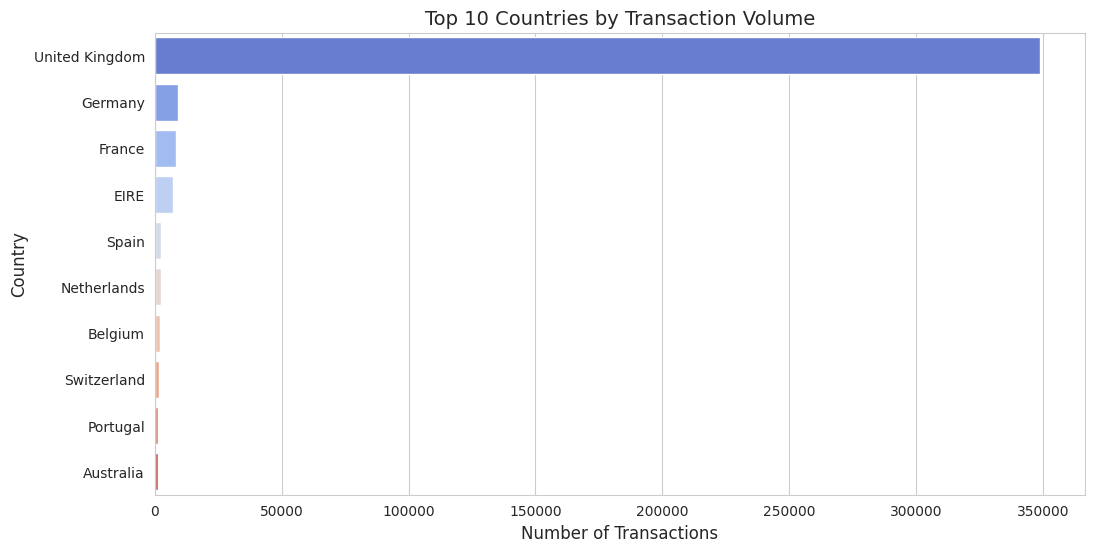

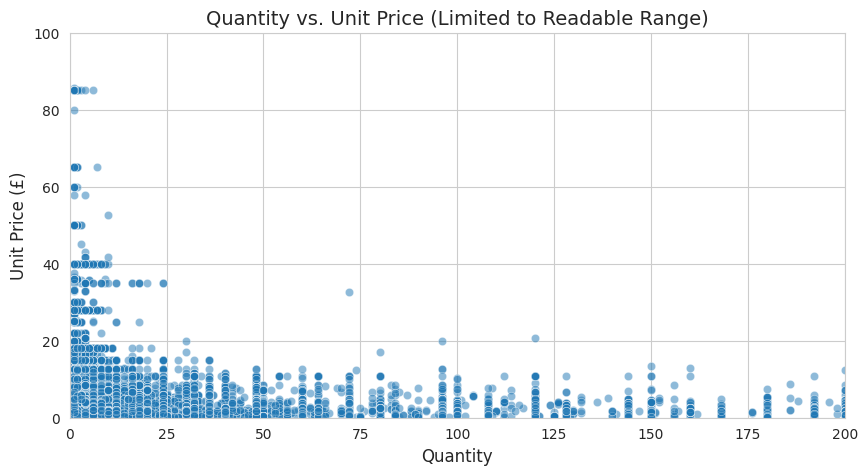

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Load the dataset (assuming Online_Retail is already loaded)

## ---- 1. TRANSACTION TREND OVER TIME ---- ##
plt.figure(figsize=(12, 6))
Online_Retail['InvoiceDate'] = pd.to_datetime(Online_Retail['InvoiceDate'])  # Ensure datetime format
Online_Retail.set_index('InvoiceDate').resample('M')['InvoiceNo'].nunique().plot()
plt.title('Number of Unique Transactions Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Unique Transactions', fontsize=12)
plt.show()

## ---- 2. DISTRIBUTION OF ORDER QUANTITIES ---- ##
plt.figure(figsize=(10, 5))
sns.histplot(Online_Retail[Online_Retail['Quantity'] <= 100]['Quantity'], bins=50, kde=True)
plt.title("Distribution of Order Quantities (Limited to ≤100 for readability)", fontsize=14)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## ---- 3. TOP 10 BEST-SELLING PRODUCTS ---- ##
top_products = Online_Retail['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()

## ---- 4. UNIT PRICE DISTRIBUTION ---- ##
plt.figure(figsize=(10, 5))
sns.histplot(Online_Retail[Online_Retail['UnitPrice'] <= 50]['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of Unit Prices (Limited to ≤50 for readability)", fontsize=14)
plt.xlabel("Unit Price (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## ---- 5. CUSTOMER DISTRIBUTION BY COUNTRY ---- ##
top_countries = Online_Retail['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Transaction Volume", fontsize=14)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

## ---- 6. RELATIONSHIP BETWEEN QUANTITY AND UNIT PRICE ---- ##
plt.figure(figsize=(10, 5))
sns.scatterplot(x=Online_Retail['Quantity'], y=Online_Retail['UnitPrice'], alpha=0.5)
plt.xlim(0, 200)
plt.ylim(0, 100)
plt.title("Quantity vs. Unit Price (Limited to Readable Range)", fontsize=14)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Unit Price (£)", fontsize=12)
plt.show()
